hello


In [4]:
import openai

In [6]:
from langgraph.graph import START, StateGraph



In [8]:
from typing_extensions import TypedDict


class State(TypedDict):
    value_1: str
    value_2: int

In [10]:
def step_1(state: State):
    return {"value_1": "a"}


def step_2(state: State):
    current_value_1 = state["value_1"]
    return {"value_1": f"{current_value_1} b"}


def step_3(state: State):
    return {"value_2": 10}


In [11]:

graph_builder = StateGraph(State)

# Add nodes
graph_builder.add_node(step_1)
graph_builder.add_node(step_2)
graph_builder.add_node(step_3)

# Add edges
graph_builder.add_edge(START, "step_1")
graph_builder.add_edge("step_1", "step_2")
graph_builder.add_edge("step_2", "step_3")

In [13]:
graph = graph_builder.compile()

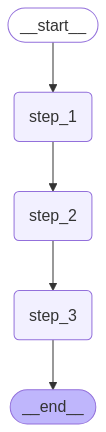

In [14]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [15]:
graph.invoke({"value_1": "c"})

{'value_1': 'a b', 'value_2': 10}